<a href="https://colab.research.google.com/github/krshrey10/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-04**

**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

---



# **1. Data Collection and Preparation**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitterr.zip to twitterr.zip


In [5]:
import io
import zipfile

zip_data = uploaded['twitterr.zip']

zip_file_object = io.BytesIO(zip_data)

with zipfile.ZipFile(zip_file_object, 'r') as z:
    z.printdir()

File Name                                             Modified             Size
twitter_training.csv                           2021-08-09 02:52:12     10325088
twitter_validation.csv                         2021-08-09 02:52:14       164351


In [7]:
data = pd.DataFrame({
    'text': [
        "I love the new iPhone camera! Best upgrade ever!",
        "Disappointed with the battery life though",
        "The customer service is terrible",
        "Amazing product, worth every penny",
        "Not what I expected for this price point",
        "The design is sleek and modern",
        "Would not recommend to anyone",
        "Perfect for my needs!"
    ],
    'platform': ['Twitter', 'Facebook', 'Twitter', 'Instagram', 'Reddit', 'Twitter', 'Facebook', 'Instagram'],
    'date': pd.date_range(start='2023-01-01', periods=8)
})

In [8]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

# **2. Sentiment Analysis**

---



In [9]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

def sentiment_category(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_label'] = data['sentiment'].apply(sentiment_category)

print(data[['text', 'sentiment', 'sentiment_label']])

                                               text  sentiment sentiment_label
0  I love the new iPhone camera! Best upgrade ever!   0.545455        Positive
1         Disappointed with the battery life though  -0.750000        Negative
2                  The customer service is terrible  -1.000000        Negative
3                Amazing product, worth every penny   0.450000        Positive
4          Not what I expected for this price point  -0.100000         Neutral
5                    The design is sleek and modern   0.200000        Positive
6                     Would not recommend to anyone   0.000000         Neutral
7                             Perfect for my needs!   1.000000        Positive


# **3. Sentiment Visualization**

---



**Sentiment Distribution**

/tmp/ipython-input-10-1679470129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=data,


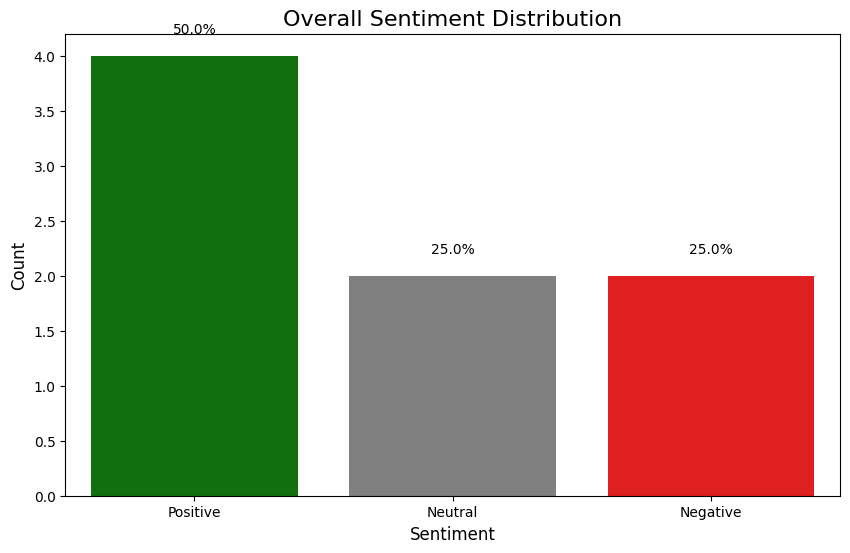

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=data,
              order=['Positive', 'Neutral', 'Negative'],
              palette={'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'})
plt.title('Overall Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

total = len(data)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.2
    plt.gca().annotate(percentage, (x, y), ha='center')

plt.show()

**Sentiment Over Time**

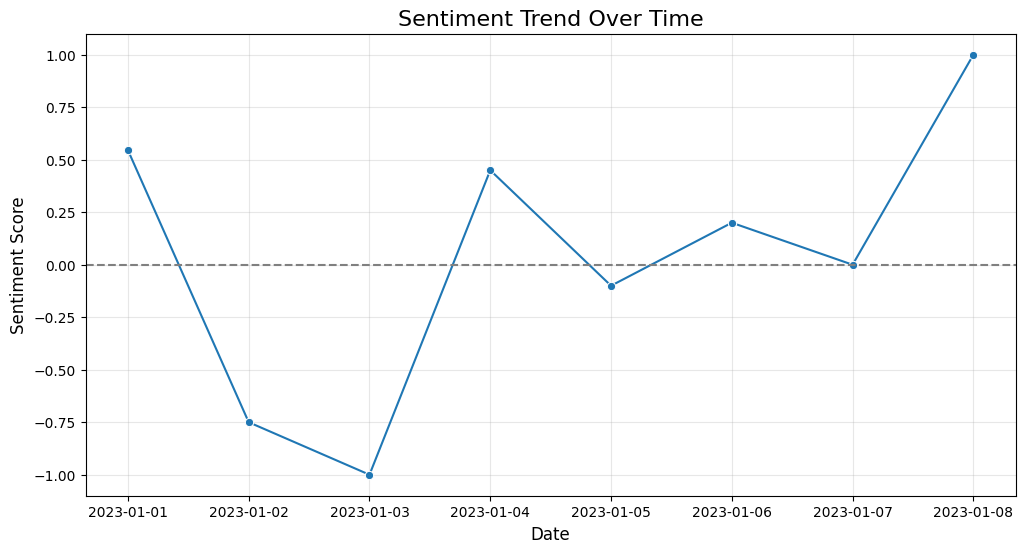

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment', data=data, marker='o')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Sentiment Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Sentiment by Platform**

/tmp/ipython-input-12-263599963.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='sentiment', data=data,


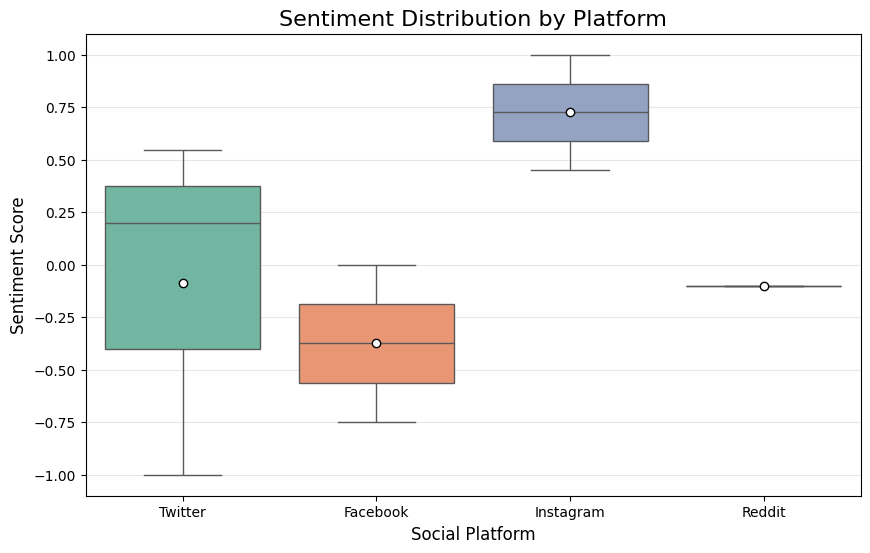

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='sentiment', data=data,
            palette='Set2', showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title('Sentiment Distribution by Platform', fontsize=16)
plt.xlabel('Social Platform', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# **4. Word Cloud Analysis**

---



In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

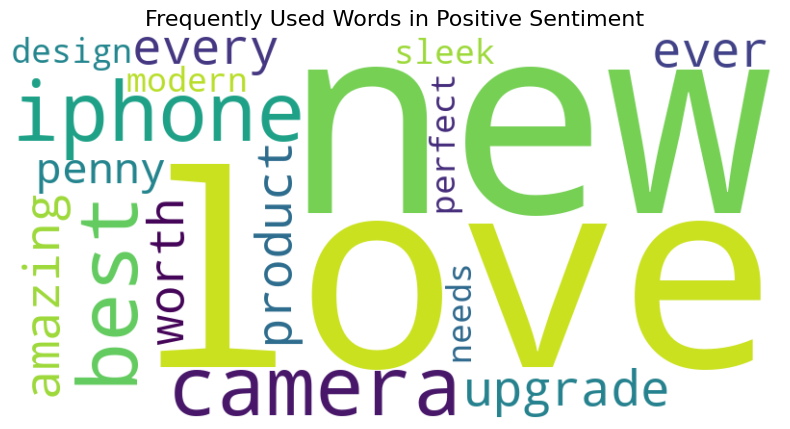

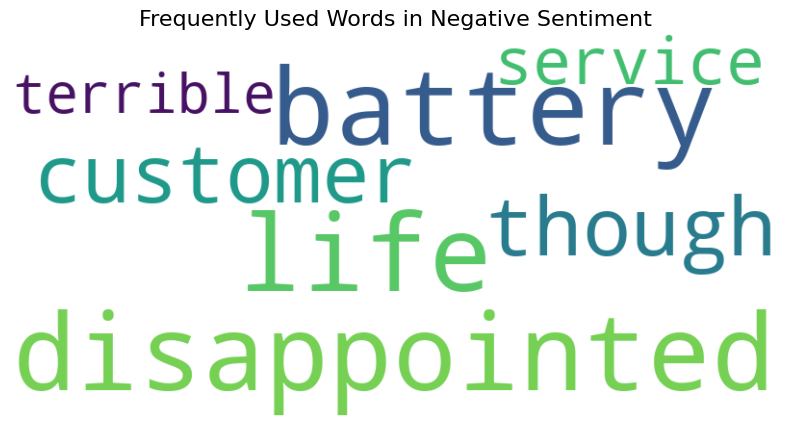

In [22]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         stopwords=set(stopwords.words('english'))).generate(' '.join(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

positive_text = data[data['sentiment_label'] == 'Positive']['cleaned_text']
generate_wordcloud(positive_text, 'Frequently Used Words in Positive Sentiment')

negative_text = data[data['sentiment_label'] == 'Negative']['cleaned_text']
generate_wordcloud(negative_text, 'Frequently Used Words in Negative Sentiment')